In [1]:
#データセットの用意
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


In [2]:
#データセットの確認
print(X_train.shape)
print(X_test.shape)
print(X_test[0].dtype)
print(X_train[0])


(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
#reshape
test = X_train[0]
print(test.shape)
test = test.reshape(-1, 1)
print(test.shape)

(28, 28)
(784, 1)


In [4]:
#reshape
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

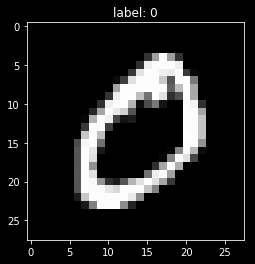

In [6]:
#画像データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 1
image = X_train[index].reshape(28, 28)
#X_train[index]: (784,)
#image: (28, 28)
plt.style.use('dark_background')
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title("label: %s" % (y_train[index]))
plt.show()

In [7]:
#前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

1.0
0.0


In [8]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [9]:
#target のone hot encode

uniq = np.unique(y_train) 
eye = np.eye(len(uniq))
y_train_one_hot = eye[y_train]
y_test_one_hot = eye[y_test]
print("unique element in y:\n", uniq)
print("eye: \n", eye)
print("y_train_one_hot")
print(y_train_one_hot.shape)
print(y_train_one_hot.dtype)
print(y_train_one_hot)

unique element in y:
 [0 1 2 3 4 5 6 7 8 9]
eye: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
y_train_one_hot
(60000, 10)
float64
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [10]:
#split into train, val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape) 

(48000, 784)
(12000, 784)


## 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。

In [11]:
#まずはイメージを掴む


### Forward Propagation

In [12]:
#forward propagation
batch_size = len(uniq)
n_features = X_train.shape[1]
n_nodes1 = 400 
n_nodes2 = 200
n_output = 10 #(last node)

In [18]:
#mini batch
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size)

print(len(get_mini_batch)) # 4800
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    print(mini_X_train.shape, mini_y_train)
    pass

4800
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 9, 6, 5, 9, 8, 5, 5, 6, 5], dtype=uint8))
(10, 784) [7 8 7 7 2 3 8 5 3 9]
(10, 784) [5 8 3 1 3 4 7 3 1 6]
(10, 784) [5 4 9 9 8 8 7 1 7 1]
(10, 784) [3 4 7 5 7 8 9 7 3 3]
(10, 784) [8 8 2 8 2 2 3 8 6 4]
(10, 784) [1 9 6 5 9 8 5 5 6 5]
(10, 784) [6 7 8 8 5 0 4 4 4 3]
(10, 784) [0 2 1 7 4 0 0 2 0 2]
(10, 784) [0 7 1 7 6 5 1 9 0 0]
(10, 784) [1 7 7 5 5 9 1 8 1 0]
(10, 784) [9 8 3 9 9 3 7 2 8 7]
(10, 784) [5 0 2 4 5 7 7 1 6 4]
(10, 784) [2 2 1 2 3 1 4 8 4 4]
(10, 784) [9 4 8 7 3 6 1 5 4 7]
(10, 784) [2 8 0 9 4 4 0 4 2 4]
(10, 784) [3 3 0 9 1 7 0 1 9 9]
(10, 784) [5 7 2 1 1 2 0 9 4 7]
(10, 784) [0 2 7 2 4 2 7 2 5 0]
(10, 784) [2 0 7 7 4 2 4 7 8 2]
(10, 784) [8 2 6 8 9 0 2 5 2 7]
(10, 784) [4 5 6 7 2 8 0 1 5 7]
(10, 784) [7 7 0 5 4 0 6 4 3

(10, 784) [1 8 9 0 6 6 5 7 1 5]
(10, 784) [4 6 9 5 1 9 8 6 3 6]
(10, 784) [5 4 5 1 0 5 8 0 7 6]
(10, 784) [7 3 9 3 9 6 9 5 8 4]
(10, 784) [3 4 2 8 8 6 2 3 8 4]
(10, 784) [0 7 8 3 9 8 9 4 0 6]
(10, 784) [5 0 0 2 7 4 8 2 9 3]
(10, 784) [4 2 2 3 1 1 5 4 8 2]
(10, 784) [8 8 6 3 0 4 1 5 6 5]
(10, 784) [3 1 4 7 0 3 9 8 8 9]
(10, 784) [9 1 6 7 1 3 9 6 3 2]
(10, 784) [8 8 9 3 2 8 0 0 8 8]
(10, 784) [3 4 4 8 2 5 8 4 6 1]
(10, 784) [0 0 5 2 1 7 1 4 1 0]
(10, 784) [1 5 5 4 7 5 2 7 9 9]
(10, 784) [5 0 2 4 2 9 4 2 3 0]
(10, 784) [1 0 4 3 3 0 4 2 9 3]
(10, 784) [1 4 5 4 6 1 4 8 6 8]
(10, 784) [3 2 8 0 2 1 1 4 3 1]
(10, 784) [4 3 2 4 4 8 5 3 0 1]
(10, 784) [6 6 1 9 6 2 9 5 9 3]
(10, 784) [5 8 2 9 8 4 9 5 8 8]
(10, 784) [7 2 3 9 5 2 0 3 8 5]
(10, 784) [7 7 4 1 4 1 2 1 3 6]
(10, 784) [5 0 0 3 5 4 1 4 6 7]
(10, 784) [6 5 3 6 4 5 6 1 5 3]
(10, 784) [8 8 7 3 3 8 3 3 4 5]
(10, 784) [1 9 1 2 2 5 1 4 2 7]
(10, 784) [9 9 3 5 8 1 8 8 7 7]
(10, 784) [8 6 9 3 6 9 4 1 2 8]
(10, 784) [1 1 9 7 4 9 9 3 6 4]
(10, 784

(10, 784) [7 6 4 1 0 0 0 1 0 3]
(10, 784) [6 5 8 2 2 1 6 2 5 1]
(10, 784) [8 7 6 0 5 5 0 9 7 3]
(10, 784) [6 3 6 3 9 8 3 2 5 9]
(10, 784) [6 7 5 1 9 2 1 3 3 9]
(10, 784) [5 8 2 5 1 0 0 1 0 1]
(10, 784) [3 7 2 2 0 9 9 8 4 6]
(10, 784) [3 3 1 5 2 3 1 5 7 1]
(10, 784) [8 6 3 4 0 0 4 3 1 7]
(10, 784) [6 1 5 2 0 2 4 9 5 5]
(10, 784) [2 5 5 0 2 7 0 1 7 0]
(10, 784) [8 2 2 9 6 8 5 1 4 6]
(10, 784) [2 6 9 1 4 8 5 7 6 2]
(10, 784) [7 3 8 7 1 5 1 4 8 6]
(10, 784) [5 6 5 7 6 6 9 3 1 1]
(10, 784) [5 8 9 9 1 2 0 3 8 1]
(10, 784) [1 1 1 6 4 3 8 1 7 3]
(10, 784) [4 2 0 7 7 5 2 4 7 0]
(10, 784) [0 9 9 6 2 1 1 0 6 8]
(10, 784) [6 2 1 0 0 8 7 8 7 7]
(10, 784) [5 5 5 2 8 7 2 5 8 7]
(10, 784) [0 2 3 8 5 1 0 9 7 4]
(10, 784) [7 0 7 9 3 7 5 7 3 9]
(10, 784) [2 8 5 3 2 2 7 1 3 3]
(10, 784) [9 4 2 6 8 3 8 3 3 6]
(10, 784) [9 5 4 6 4 9 9 3 6 9]
(10, 784) [4 0 7 3 1 4 7 5 9 3]
(10, 784) [3 1 8 8 9 0 8 9 7 3]
(10, 784) [3 9 0 0 6 5 2 6 6 3]
(10, 784) [7 9 7 8 7 1 0 7 5 3]
(10, 784) [2 7 0 6 7 2 5 0 8 9]
(10, 784

(10, 784) [8 3 9 9 5 7 6 6 8 1]
(10, 784) [3 8 8 1 3 6 0 2 4 0]
(10, 784) [3 9 8 9 4 3 9 5 2 4]
(10, 784) [8 8 0 6 9 0 1 2 0 8]
(10, 784) [7 4 5 7 2 5 7 9 8 2]
(10, 784) [9 8 1 7 2 7 6 5 7 5]
(10, 784) [5 3 5 5 5 9 9 4 5 7]
(10, 784) [6 2 0 4 3 5 4 7 8 1]
(10, 784) [0 3 5 8 4 5 7 6 9 7]
(10, 784) [0 1 6 7 1 6 9 6 0 4]
(10, 784) [7 6 9 1 7 5 1 1 4 6]
(10, 784) [1 6 0 1 2 1 6 0 1 0]
(10, 784) [6 5 2 9 4 4 6 5 8 6]
(10, 784) [9 3 8 6 9 5 4 8 0 1]
(10, 784) [7 7 9 2 6 6 7 2 3 8]
(10, 784) [1 6 8 7 1 6 0 3 0 4]
(10, 784) [3 3 2 5 7 0 8 9 4 7]
(10, 784) [4 4 2 6 7 6 4 2 0 6]
(10, 784) [6 1 9 0 0 0 2 7 8 7]
(10, 784) [9 9 7 5 1 0 4 8 0 6]
(10, 784) [8 4 6 3 3 8 0 1 3 1]
(10, 784) [4 3 9 8 2 6 6 6 7 6]
(10, 784) [8 2 3 0 6 5 8 2 6 2]
(10, 784) [3 8 2 9 0 3 1 0 6 7]
(10, 784) [6 4 0 1 9 8 7 6 9 1]
(10, 784) [2 4 7 1 8 2 6 2 9 5]
(10, 784) [0 7 9 6 1 0 8 1 4 9]
(10, 784) [0 3 2 0 7 4 4 6 8 2]
(10, 784) [7 0 7 6 5 8 9 6 8 3]
(10, 784) [9 7 9 2 1 7 5 4 7 2]
(10, 784) [1 9 2 0 0 8 1 6 7 5]
(10, 784

(10, 784) [0 4 6 6 8 2 5 1 1 5]
(10, 784) [2 4 8 3 9 3 1 4 2 0]
(10, 784) [0 2 9 1 7 0 3 6 8 7]
(10, 784) [1 3 1 8 8 2 4 0 1 2]
(10, 784) [0 1 7 1 4 5 3 4 6 4]
(10, 784) [1 6 3 6 9 4 8 9 9 3]
(10, 784) [3 6 0 3 2 0 1 6 1 1]
(10, 784) [9 4 2 6 1 7 6 1 0 7]
(10, 784) [4 2 5 9 2 3 7 9 0 8]
(10, 784) [0 4 1 9 7 0 2 0 2 1]
(10, 784) [0 4 4 3 8 2 2 1 2 6]
(10, 784) [6 0 7 6 4 3 2 7 8 8]
(10, 784) [8 9 2 0 8 4 0 1 4 4]
(10, 784) [4 0 1 0 0 0 4 4 7 2]
(10, 784) [6 9 0 5 4 9 6 3 1 5]
(10, 784) [6 2 1 5 2 5 6 6 5 3]
(10, 784) [2 8 1 0 8 9 0 4 7 7]
(10, 784) [3 2 9 4 9 8 8 7 9 4]
(10, 784) [5 8 4 7 5 0 0 9 7 2]
(10, 784) [6 4 5 8 2 6 9 5 3 5]
(10, 784) [5 3 8 6 0 3 0 0 3 1]
(10, 784) [5 2 9 5 1 2 7 6 1 8]
(10, 784) [1 6 5 4 7 3 3 1 3 6]
(10, 784) [9 8 9 6 1 8 9 9 0 1]
(10, 784) [0 2 4 9 9 4 0 7 7 5]
(10, 784) [3 1 2 6 9 5 2 9 4 1]
(10, 784) [9 3 7 0 6 9 9 4 0 9]
(10, 784) [3 9 4 4 3 9 0 8 0 3]
(10, 784) [3 9 3 6 4 6 6 8 9 2]
(10, 784) [4 8 9 8 9 7 9 0 9 9]
(10, 784) [6 0 2 1 8 3 0 6 1 9]
(10, 784

(10, 784) [6 2 1 3 6 9 0 3 6 1]
(10, 784) [7 9 7 5 7 9 4 4 3 9]
(10, 784) [5 8 9 6 2 7 7 4 5 2]
(10, 784) [5 2 1 5 5 3 8 5 0 4]
(10, 784) [9 2 0 0 6 1 0 3 3 6]
(10, 784) [2 2 5 7 8 3 9 7 1 8]
(10, 784) [8 2 2 1 3 6 5 7 1 4]
(10, 784) [6 2 9 9 5 2 7 0 6 4]
(10, 784) [8 3 0 0 1 8 4 9 3 6]
(10, 784) [9 9 6 7 3 5 4 6 4 2]
(10, 784) [1 8 7 8 0 0 2 5 6 3]
(10, 784) [9 2 1 3 7 7 4 2 7 2]
(10, 784) [6 0 9 9 5 6 9 5 2 3]
(10, 784) [9 3 6 1 5 4 8 7 8 7]
(10, 784) [1 4 9 3 4 9 7 5 2 4]
(10, 784) [1 8 7 5 1 8 6 1 5 0]
(10, 784) [6 1 1 7 7 3 7 4 3 3]
(10, 784) [4 1 9 8 7 9 5 9 3 5]
(10, 784) [8 0 6 0 7 7 8 9 9 0]
(10, 784) [3 4 4 4 0 4 7 0 1 6]
(10, 784) [1 8 6 6 6 0 0 0 8 8]
(10, 784) [7 9 9 7 2 3 0 5 6 6]
(10, 784) [2 2 1 9 1 9 0 2 2 3]
(10, 784) [1 7 8 2 7 2 2 0 5 1]
(10, 784) [0 5 3 3 9 3 8 0 3 6]
(10, 784) [1 4 8 8 8 0 2 7 3 3]
(10, 784) [1 6 6 1 7 5 9 6 9 8]
(10, 784) [2 1 1 2 7 4 8 8 7 9]
(10, 784) [5 9 5 5 7 4 9 5 1 9]
(10, 784) [3 3 8 0 1 9 2 7 2 2]
(10, 784) [2 6 8 1 1 5 2 0 0 3]
(10, 784

(10, 784) [9 0 9 0 4 1 3 2 5 1]
(10, 784) [7 5 2 0 2 7 7 6 5 9]
(10, 784) [6 9 9 7 5 9 8 8 5 4]
(10, 784) [4 2 4 7 2 9 6 1 0 2]
(10, 784) [2 9 2 1 4 6 0 8 9 3]
(10, 784) [5 6 2 6 3 4 6 6 5 9]
(10, 784) [5 1 1 7 0 2 2 3 3 5]
(10, 784) [4 9 9 9 9 5 3 1 8 9]
(10, 784) [0 4 0 4 5 9 8 3 0 4]
(10, 784) [3 6 2 3 4 0 8 8 7 1]
(10, 784) [7 9 5 5 8 4 8 4 6 6]
(10, 784) [4 9 4 9 9 9 9 1 1 8]
(10, 784) [8 6 7 7 2 7 3 1 9 4]
(10, 784) [4 3 9 6 1 3 5 8 8 9]
(10, 784) [2 4 6 9 3 7 8 1 5 8]
(10, 784) [3 3 5 2 6 7 2 7 5 2]
(10, 784) [0 6 8 1 6 7 7 1 6 6]
(10, 784) [5 9 9 6 9 6 7 8 3 2]
(10, 784) [7 3 1 6 1 8 1 2 1 4]
(10, 784) [0 2 3 3 1 4 8 0 2 9]
(10, 784) [5 9 2 7 3 4 1 4 8 7]
(10, 784) [2 6 8 4 2 2 1 7 7 0]
(10, 784) [8 0 3 5 5 9 6 8 7 6]
(10, 784) [0 2 4 7 4 3 7 8 3 9]
(10, 784) [4 8 2 1 6 8 7 8 1 3]
(10, 784) [3 4 7 1 7 4 0 8 4 5]
(10, 784) [3 1 9 2 2 2 5 7 6 1]
(10, 784) [9 9 3 8 4 6 9 5 3 8]
(10, 784) [3 6 4 4 5 2 5 2 5 8]
(10, 784) [7 8 3 7 4 1 7 3 7 2]
(10, 784) [5 0 1 1 3 0 4 6 3 6]
(10, 784

(10, 784) [0 1 3 1 6 7 8 9 4 3]
(10, 784) [8 9 3 9 0 9 4 1 7 5]
(10, 784) [7 6 8 6 6 9 1 5 7 8]
(10, 784) [0 9 4 6 4 4 9 0 1 3]
(10, 784) [8 9 5 7 7 3 2 3 4 2]
(10, 784) [0 1 6 2 9 5 0 4 6 7]
(10, 784) [4 5 7 6 3 1 7 6 0 7]
(10, 784) [0 6 3 4 6 2 5 7 8 7]
(10, 784) [8 4 8 8 2 3 1 8 1 6]
(10, 784) [1 8 0 5 2 1 3 8 9 0]
(10, 784) [2 5 6 1 2 2 4 9 3 6]
(10, 784) [2 2 7 1 4 0 7 1 0 1]
(10, 784) [8 6 8 0 3 1 1 3 2 1]
(10, 784) [4 8 3 2 4 4 3 7 0 8]
(10, 784) [2 9 5 5 8 0 6 7 0 6]
(10, 784) [6 7 7 8 0 1 3 8 2 4]
(10, 784) [1 3 3 3 1 0 7 5 1 5]
(10, 784) [6 0 0 4 0 2 7 5 6 1]
(10, 784) [2 4 8 8 7 6 6 3 5 4]
(10, 784) [8 2 2 4 3 2 4 0 8 3]
(10, 784) [3 1 6 6 7 8 5 1 3 6]
(10, 784) [5 3 0 7 2 8 1 1 3 9]
(10, 784) [0 1 8 8 0 8 2 6 6 6]
(10, 784) [4 9 6 1 0 4 4 8 1 5]
(10, 784) [1 7 4 1 0 3 0 8 7 3]
(10, 784) [1 6 9 7 6 1 5 0 8 1]
(10, 784) [3 1 3 9 3 8 1 8 9 5]
(10, 784) [8 1 4 7 8 0 2 1 9 6]
(10, 784) [7 2 2 4 4 3 0 6 8 6]
(10, 784) [5 9 2 5 3 9 3 8 0 6]
(10, 784) [2 9 7 7 1 0 0 7 2 4]
(10, 784

(10, 784) [8 8 0 8 0 9 8 1 8 5]
(10, 784) [3 8 5 6 6 4 7 9 2 6]
(10, 784) [9 2 9 9 6 5 7 5 8 0]
(10, 784) [2 6 7 7 6 6 4 6 0 0]
(10, 784) [5 6 8 6 4 4 4 3 7 1]
(10, 784) [2 7 3 9 1 3 8 7 1 0]
(10, 784) [0 5 2 7 4 4 2 4 3 2]
(10, 784) [9 6 3 3 2 6 6 5 5 7]
(10, 784) [4 3 0 9 1 0 1 4 3 5]
(10, 784) [3 9 5 6 3 5 2 0 1 5]
(10, 784) [6 2 2 0 4 9 9 2 7 2]
(10, 784) [2 8 8 5 4 4 6 2 4 3]
(10, 784) [1 5 6 7 9 7 2 9 6 1]
(10, 784) [7 7 3 6 7 3 4 3 0 2]
(10, 784) [2 0 7 1 6 7 1 5 8 4]
(10, 784) [7 0 3 0 4 6 1 8 4 8]
(10, 784) [1 9 0 2 2 9 6 5 8 0]
(10, 784) [7 7 5 4 7 3 0 8 8 7]
(10, 784) [6 1 0 1 1 0 1 1 1 0]
(10, 784) [9 7 5 8 8 6 2 9 3 0]
(10, 784) [5 9 5 1 8 7 2 7 0 1]
(10, 784) [5 4 2 0 4 3 1 3 6 2]
(10, 784) [2 6 9 0 5 1 2 9 0 6]
(10, 784) [0 8 6 5 0 9 0 9 2 2]
(10, 784) [4 3 1 3 0 3 9 6 8 1]
(10, 784) [0 7 6 6 2 3 5 8 4 6]
(10, 784) [9 1 2 4 2 6 2 8 8 2]
(10, 784) [0 0 7 4 1 1 3 8 3 8]
(10, 784) [8 2 4 1 8 4 4 4 5 4]
(10, 784) [0 4 9 8 7 1 7 8 4 7]
(10, 784) [7 4 1 0 6 1 0 4 7 2]
(10, 784

In [19]:
#activation function
def sigmoid(a):
        return 1/(1 + np.exp(-a))
#soft_max_function
def soft_max(a):
        return np.exp(a)/np.exp(a).sum()

In [22]:

inpt =  get_mini_batch[5]
sigma = 0.01 #standard error of gaussian distribution
#node_1
w_1 = sigma * np.random.randn(n_features, n_nodes1)
b_1 = np.ones((n_nodes1, ))
#X: (batch_size, n_features) 
a_1 = inpt[0] @ w_1 + b_1
z_1 = sigmoid(a_1)
print(w_1.shape)
print(b_1.shape)
print(a_1.shape)
print(z_1.shape)

(784, 400)
(400,)
(10, 400)
(10, 400)


In [24]:
#node_2
w_2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b_2 = np.ones((n_nodes2,))

a_2 = z_1 @ w_2 + b_2
z_2 = sigmoid(a_2)
print(w_2.shape)
print(b_2.shape)
print(a_2.shape)
print(z_2.shape)

(400, 200)
(200,)
(10, 200)
(10, 200)


In [25]:
#node_3
w_3 = sigma * np.random.randn(n_nodes2, n_output)
b_3 = np.ones((n_output,))

a_3 = z_2 @ w_3 + b_3
z_3 = soft_max(a_3)
print(w_3.shape)
print(b_3.shape)
print(a_3.shape)
print(z_3.shape)

(200, 10)
(10,)
(10, 10)
(10, 10)


In [26]:
#cross entropy error (cost function)
ans = eye[inpt[1]]
L = - (ans.T @ np.log(z_3)).sum(axis=0)
print(L)


[45.24271815 46.84134975 47.44069562 46.63659032 46.65024028 45.67222976
 44.81017845 46.34153794 45.55454432 45.63077813]


### Back Propagation


$$
A_3 = Z_2 \cdot W_3 + B_3
$$
より、

$$
\frac{\partial A_3}{\partial B_3}  = 1, \frac{\partial A_3}{\partial W_3} = Z_2, \frac{\partial A_3}{\partial Z_2} =W_3
$$
を利用して

$$
\frac{\partial L}{\partial B_3} = \frac{\partial L}{\partial A_3} \cdot \frac{\partial A_3}{\partial B_3}  = \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial A_3}\cdot \frac{\partial A_3}{\partial W_3} = Z_2^T \cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3}\cdot \frac{\partial A_3}{\partial Z_2}　= \frac{\partial L}{\partial A_3}\cdot W_3^T
$$
ここで、
$$
\frac{\partial L}{\partial A_3} =\frac{\partial L}{\partial Z_3}\cdot \frac{\partial Z_3}{\partial A_3} = Z_3 - Y\\
$$
であるから、

In [27]:

lr = 0.001#学習率

#node_3
#正解している要素だけ傾きがゼロに近づく
dL_dA3 = z_3 - ans
dL_dB3 = dL_dA3
dL_dW3 =  z_2.T @ dL_dA3
dL_dZ2 = dL_dA3 @ w_3.T
print(dL_dA3.shape)
print(dL_dB3.shape)
print(dL_dW3.shape)
print(dL_dZ2.shape)

#更新
print(w_3.mean())
print(b_3.mean())
w_3 = w_3 - lr * dL_dW3
b_3 = b_3 - lr * dL_dB3
print(w_3.mean())
print(b_3.mean())


(10, 10)
(10, 10)
(200, 10)
(10, 200)
-0.000367748537480625
1.0
0.00028872262583546417
1.00009


In [28]:
#node_2
dL_dA2 = dL_dZ2 * (1- sigmoid(a_2)) * sigmoid(a_2)
print(dL_dA2.shape)

dL_dW2 = z_1.T @ dL_dA2
dL_dB2 = dL_dA2
dL_dZ1 = dL_dA2 @ w_2.T
print(dL_dW2.shape)
print(dL_dB2.shape)
print(dL_dZ1.shape)

#更新
print(w_2.mean())
print(b_2.mean())
w_2 = w_2 - lr * dL_dW2
b_2 = b_2 - lr * dL_dB2
print(w_2.mean())
print(b_2.mean())


(10, 200)
(400, 200)
(10, 200)
(10, 400)
-1.2592786088411667e-05
1.0
-1.263761263184644e-05
0.9999999938495614


In [29]:
#node_1
dL_dA1 = dL_dZ1 * (1- sigmoid(a_1)) * sigmoid(a_1)
print(dL_dA1.shape)

dL_dW1 = inpt[1].T @ dL_dA1  
dL_dB1 = dL_dA1
dL_dX = dL_dA1 @ w_1.T
print(dL_dW1.shape)
print(dL_dB1.shape)
print(dL_dX.shape)

#更新
print(w_1.mean())
print(b_1.mean())
w_1 = w_1 - lr * dL_dW1
b_1 = b_1 - lr * dL_dB1
print(w_1.mean())
print(b_1.mean())

(10, 400)
(400,)
(10, 400)
(10, 784)
-7.597725532224197e-06
1.0
-7.463781968113995e-06
1.000000001386167


In [174]:
import numpy as np

class Layer():
        """
        ニューラルネットワーク分類器の各層を表すクラス

        Parameters
        ----------

        Attributes
        ----------
        """

        
        def __init__(self,pre_layer,  layer, node_size_list, feat_train, target_train):
                self.layer = layer
                self.node_size_list = node_size_list
                self.feat_train = feat_train
                self.target_train = target_train
                self.lr = 0.01
                self.n_loop = 0
                self.max_layer = len(node_size_list)
                self.n_nodes = node_size_list[layer - 1]
                self.n_features = feat_train.shape[1]
                self.coef_ = None
                self.bias = None
                self.pre_layer = pre_layer
                self.nxt_layer = None
                self.dL_dA = None
                self.dL_dW = None
                self.dL_dB = None
                self.dL_dZ = None
                self.a = None
                sigma = 0.01 
                #係数初期化
                #w
                if (self.layer > 1):
                        self.coef_ =  sigma * np.random.randn(self.pre_layer.n_nodes, self.n_nodes)
                #1層目の時
                else:
                        self.coef_ =  sigma * np.random.randn(self.n_features, self.n_nodes)
                #b
                self.bias = sigma * np.random.randn(self.n_nodes,)
                
        def propagate_forward(self):
                #
                self.a = self.feat_train @ self.coef_ + self.bias
                self.z = self._activate_forward(self.a)
                self.n_loop += 1
                
                print("feat: ", self.feat_train.shape)
                print("a: ", self.a.shape)
                print("w: ", self.coef_.shape)
                print("b: ", self.bias.shape)     
                print("z: ", self.z.shape)
                #最後の層に達したら再帰終了
                if (self.layer == self.max_layer):
                        print("finished forward propagation")
                        h = self.propagate_backward()
                        return "hehe" ,h
                
                #再帰して次の層を呼ぶ
                self.nxt_layer = Layer(
                        pre_layer=self,
                        layer=self.layer + 1,
                        node_size_list= self.node_size_list,
                        feat_train=self.z,
                        target_train=self.target_train
                )

                return self.nxt_layer.propagate_forward()
        
        def propagate_backward(self):
                
                #最後の層なら
                if (self.layer == self.max_layer):
                        self.dL_dA = (self.z - self.target_train ) * self._activate_backward(self.a)
                else:
                        self.dL_dA = self.dL_dZ * self._activate_backward(self.a)
                self.dL_dB = self.dL_dA
                
                print("dL_dA: ", self.dL_dA.shape)
                print("dL_dB: ", self.dL_dB.shape)
                
                if (self.layer ==1):
                        print("self.pre_layer.z.T (X): ", self.feat_train.shape)
                        self.dL_dW = self.feat_train.T @ self.dL_dA
                else:
                        print("self.pre_layer.z.T: ", self.pre_layer.z.shape)
                        self.dL_dW = self.pre_layer.z.T @ self.dL_dA
                        self.pre_layer.dL_dZ = self.dL_dA @ self.coef_.T
                        print("dL_dW: ", self.dL_dW.shape)
                        print("pre_layer.dL_dZ: ", self.pre_layer.dL_dZ.shape)
                print("dL_dW: ", self.dL_dW.shape)
                
                self._update_coef()
                
                if (self.layer == 1):
                        print("finished backward propagation")
                        if (self.n_loop < 10):
                                self.propagate_forward()
                        return 'hoho'
                
                return self.pre_layer.propagate_backward()
        
        def _update_coef(self):
                print("updating layer ", self.layer)
                self.coef_ = self.coef_ - self.lr * np.mean(self.dL_dW, axis=0)
                self.bias = self.bias - self.lr * np.mean(self.dL_dB, axis=0)
                return
                
        def _sigmoid(self, a):
                return 1/(1 + np.exp(-a))
            
        def _softmax(self, a):
                return np.exp(a)/np.exp(a).sum()
        
        def _activate_forward(self, a):
                #最後の層なら
                if (self.layer == self.max_layer):
                        print("soft")
                        return self._softmax(a)
                #最後の層以外なら
                else:
                        print("sigmoid")
                        return self._sigmoid(a)
        
        def _activate_backward(self, a):
                #最後の層なら
                if (self.layer == self.max_layer):
                        print("soft")
                        return 1
                #最後の層以外なら
                else:
                        print("sigmoid")
                        #sigmoidの一階微分
                        return (1 - self._sigmoid(a)) * self._sigmoid(a)
        def _cross_entropy():
                return
        def return_learned_probability():
                
                return
class ScratchSimpleNeuralNetrowkClassifier():
        """
        シンプルな三層ニューラルネットワーク分類器

        Parameters
        ----------

        Attributes
        ----------
        """

        def __init__(self, verbose=True, batch_size=10):
                self.coef_ = None
                self.bias = None
                self.verbose = verbose
                self.batch_size = batch_size
                self.lr = None
                self.n_samples = None
                self.n_features = None

        def fit(self, X, y, X_val=None, y_val=None):
                """
                ニューラルネットワーク分類器を学習する。

                Parameters
                ----------
                X : 次の形のndarray, shape (n_samples, n_features)
                    学習用データの特徴量
                y : 次の形のndarray, shape (n_samples, )
                    学習用データの正解値
                X_val : 次の形のndarray, shape (n_samples, n_features)
                    検証用データの特徴量
                y_val : 次の形のndarray, shape (n_samples, )
                    検証用データの正解値
                """
                
                #X, y整形
                X = np.array(X)
                y = np.array(y).reshape(-1, 1)
                
                #サンプル数
                self.n_samples = X.shape[0]
                self.n_features = X.shape[1]
                
                
                #mini batch作る
                mini_batch = GetMiniBatch(X, y, self.batch_size)
                mini_X = mini_batch[0][0]
                mini_y = mini_batch[1]
                """
                for mini_X, mini_y in mini_batch:
                        pass
                """
                node_size_list = [self.batch_size, 400, 200, self.batch_size]
                first_layer = Layer(
                        pre_layer=None,
                        layer=1,
                        node_size_list=node_size_list,
                        feat_train=mini_batch[0][0],
                        target_train=mini_batch[0][1]
                )
                
                #forword propagation（）
                p, h = first_layer.propagate_forward()
                print('hi')
                print(p, h)
                
                if self.verbose:
                    #verboseをTrueにした際は学習過程などを出力する
                    print()
                    pass
                
                return

        def predict(self, X):
                """
                ニューラルネットワーク分類器を使い推定する。

                Parameters
                ----------
                X : 次の形のndarray, shape (n_samples, n_features)
                    サンプル

                Returns
                -------
                    次の形のndarray, shape (n_samples, 1)
                    推定結果
                """
                X = np.array(X)
                

                pass
                return
            
        

class GetMiniBatch:
        """
        ミニバッチを取得するイテレータ

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        batch_size : int
          バッチサイズ
        seed : int
          NumPyの乱数のシード
        """
        def __init__(self, X, y, batch_size=10, seed=0):
                self.batch_size = batch_size
                np.random.seed(seed)
                shuffle_index = np.random.permutation(np.arange(X.shape[0]))
                self.X = X[shuffle_index]
                self.y = y[shuffle_index]
                self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

        def __len__(self):
                return self._stop

        def __getitem__(self,item):
                p0 = item*self.batch_size
                p1 = item*self.batch_size + self.batch_size
                return self.X[p0:p1], self.y[p0:p1]        

        def __iter__(self):
                self._counter = 0
                return self

        def __next__(self):
                if self._counter >= self._stop:
                        raise StopIteration()
                p0 = self._counter*self.batch_size
                p1 = self._counter*self.batch_size + self.batch_size
                self._counter += 1
                return self.X[p0:p1], self.y[p0:p1]

In [175]:
snnc = ScratchSimpleNeuralNetrowkClassifier(verbose=True, batch_size=10)
snnc.fit(X_train, y_train)

sigmoid
feat:  (10, 784)
a:  (10, 10)
w:  (784, 10)
b:  (10,)
z:  (10, 10)
sigmoid
feat:  (10, 10)
a:  (10, 400)
w:  (10, 400)
b:  (400,)
z:  (10, 400)
sigmoid
feat:  (10, 400)
a:  (10, 200)
w:  (400, 200)
b:  (200,)
z:  (10, 200)
soft
feat:  (10, 200)
a:  (10, 10)
w:  (200, 10)
b:  (10,)
z:  (10, 10)
finished forward propagation
soft
dL_dA:  (10, 10)
dL_dB:  (10, 10)
self.pre_layer.z.T:  (10, 200)
dL_dW:  (200, 10)
pre_layer.dL_dZ:  (10, 200)
dL_dW:  (200, 10)
updating layer  4
sigmoid
dL_dA:  (10, 200)
dL_dB:  (10, 200)
self.pre_layer.z.T:  (10, 400)
dL_dW:  (400, 200)
pre_layer.dL_dZ:  (10, 400)
dL_dW:  (400, 200)
updating layer  3
sigmoid
dL_dA:  (10, 400)
dL_dB:  (10, 400)
self.pre_layer.z.T:  (10, 10)
dL_dW:  (10, 400)
pre_layer.dL_dZ:  (10, 10)
dL_dW:  (10, 400)
updating layer  2
sigmoid
dL_dA:  (10, 10)
dL_dB:  (10, 10)
self.pre_layer.z.T (X):  (10, 784)
dL_dW:  (784, 10)
updating layer  1
finished backward propagation
sigmoid
feat:  (10, 784)
a:  (10, 10)
w:  (784, 10)
b:  (10

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。
ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## (オプション）誤分類の確認
誤分類した画像はどのようなものだったかを見てみましょう。